In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import Image
import glob
from sklearn.model_selection import train_test_split

from torch.nn import Flatten, Linear, ReLU, Conv2d, MaxPool2d

In [2]:
!ls /kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/

um_lane_000000.png  um_road_000033.png	 umm_road_000066.png
um_lane_000001.png  um_road_000034.png	 umm_road_000067.png
um_lane_000002.png  um_road_000035.png	 umm_road_000068.png
um_lane_000003.png  um_road_000036.png	 umm_road_000069.png
um_lane_000004.png  um_road_000037.png	 umm_road_000070.png
um_lane_000005.png  um_road_000038.png	 umm_road_000071.png
um_lane_000006.png  um_road_000039.png	 umm_road_000072.png
um_lane_000007.png  um_road_000040.png	 umm_road_000073.png
um_lane_000008.png  um_road_000041.png	 umm_road_000074.png
um_lane_000009.png  um_road_000042.png	 umm_road_000075.png
um_lane_000010.png  um_road_000043.png	 umm_road_000076.png
um_lane_000011.png  um_road_000044.png	 umm_road_000077.png
um_lane_000012.png  um_road_000045.png	 umm_road_000078.png
um_lane_000013.png  um_road_000046.png	 umm_road_000079.png
um_lane_000014.png  um_road_000047.png	 umm_road_000080.png
um_lane_000015.png  um_road_000048.png	 umm_road_000081.png
um_lane_000016.png  um_road_000049.png	 

In [3]:
!ls /kaggle/input/roadlane-detection-evaluation-2013/data_road/training/image_2/

um_000000.png  um_000058.png   umm_000021.png  umm_000079.png  uu_000041.png
um_000001.png  um_000059.png   umm_000022.png  umm_000080.png  uu_000042.png
um_000002.png  um_000060.png   umm_000023.png  umm_000081.png  uu_000043.png
um_000003.png  um_000061.png   umm_000024.png  umm_000082.png  uu_000044.png
um_000004.png  um_000062.png   umm_000025.png  umm_000083.png  uu_000045.png
um_000005.png  um_000063.png   umm_000026.png  umm_000084.png  uu_000046.png
um_000006.png  um_000064.png   umm_000027.png  umm_000085.png  uu_000047.png
um_000007.png  um_000065.png   umm_000028.png  umm_000086.png  uu_000048.png
um_000008.png  um_000066.png   umm_000029.png  umm_000087.png  uu_000049.png
um_000009.png  um_000067.png   umm_000030.png  umm_000088.png  uu_000050.png
um_000010.png  um_000068.png   umm_000031.png  umm_000089.png  uu_000051.png
um_000011.png  um_000069.png   umm_000032.png  umm_000090.png  uu_000052.png
um_000012.png  um_000070.png   umm_000033.png  umm_000091.png  uu_000053.png

In [2]:
images = !ls /kaggle/input/roadlane-detection-evaluation-2013/data_road/training/image_2/
seg=!ls /kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/

#for file_name in glob.glob('/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/*'):

    #v.append( file_name)
  

In [3]:
#print(str(images)
images=list(images)
seg=list(seg)
seg=seg[95:]
print(len(seg))


289


In [ ]:
n='/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/image_2/'+str(images[0])

print(n)
img = Image.open(n)
segg=Image.open('/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/'+str(seg[0]))

In [ ]:
img

In [ ]:
segg

In [ ]:
#seg = Image.open('/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/umm_road_000000.png')

In [4]:
data=[]


for i,j in zip(images,seg):
    #print('/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/'+j)
    
    data.append(('/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/image_2/'+i,'/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/'+j))
    

print(data[0][1])

/kaggle/input/roadlane-detection-evaluation-2013/data_road/training/gt_image_2/um_road_000000.png


In [5]:
train_data, val_data = train_test_split(data, test_size = 0.2)
print(len(train_data))

231


In [6]:
train_y    = [data[1] for data in train_data]
train_x    = [data[0] for data in train_data]
val_y     = [data[1] for data in val_data]
val_x     = [data[0] for data in val_data]

In [ ]:
print(train_x[0],train_y[0])
c= Image.open(train_y[0])
c=c.numpy()


In [7]:
def colors_to_labels(seg):
        seg=np.array(seg)
        h,w,c = seg.shape
        labels = np.zeros((h,w), dtype=np.uint8)
        mask = (seg[:,:,2] == 255)    # (255, 0, 255)
        labels[mask] = 1 
    
        return labels    

In [8]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, images, seg, transform = None):
        self.seg   = seg
        self.images = images
        self.transform = transform
    def __len__(self):
        return len(self.images)
    def colors_to_labels(seg):
        
        h,w,c = seg.shape
        labels = np.zeros((h,w), dtype=np.uint8)
        mask = (seg[:,:,2] == 255)    # (255, 0, 255)
        labels[mask] = 1 
    
        return labels    
    
    def __getitem__(self, index):
        i = self.images[index]
        j = self.seg[index]
        x = Image.open(i)
        y = Image.open(j)
        y=transforms.Resize((64,100))(y)
        y=colors_to_labels(y)
        y=torch.tensor(y).long()
        
        #y= transforms.ToPILImage()(y)
        #
        
        
        if self.transform != None:
            x = self.transform(x)
      
    
        return x,y

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
tensor(0)
tensor(1)


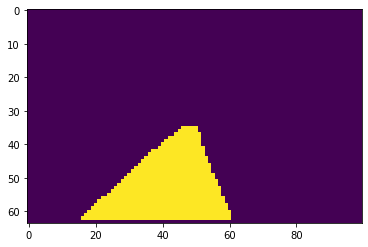

In [9]:
trainset = Dataset(train_x, train_y)
img, y = trainset[0]

plt.imshow(y)
trnsform=transforms.ToTensor()

#v=trnsform(y)
print(y)          # CHW
print(y.min())
print(y.max())

In [ ]:
train_x[0]

In [10]:
transform = transforms.Compose(
    [transforms.Resize((64,100)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = Dataset(train_x, train_y, transform=transform)
valset = Dataset(val_x, val_y, transform=transform)

In [11]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(valset, batch_size=4,
                                          shuffle=False, num_workers=2)

data_loaders = {'train':train_loader, 'val':val_loader}

In [ ]:
c= data_loaders['train']
print(c.shape)

In [ ]:
seg_np = np.array(seg)
print(seg_np.shape)

In [ ]:
seg_np[0,0]   # Red

In [ ]:
seg_np[350, 0]

In [ ]:
def colors_to_labels(seg):
    h,w,c = seg.shape
    labels = np.zeros((h,w), dtype=np.uint8)
    
    mask = (seg[:,:,2] == 255)    # (255, 0, 255)
    
    
    labels[mask] = 1 
    
    return labels

In [ ]:
labels = colors_to_labels(seg_np)

print(labels.shape)
plt.imshow(labels, cmap='gray')


In [ ]:
model = torch.nn.modules.Sequential(Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    Conv2d(in_channels=64, out_channels=3, kernel_size=3, padding=1, stride=1),
                                    )

In [ ]:
transform = transforms.ToTensor()
x = transform(img)
print(x.shape)          # CHW
print(x.min())
print(x.max())

In [ ]:
transform = transforms.ToTensor()
seg_np= transform(seg)
print(seg_np)

In [15]:
model = torch.nn.modules.Sequential(Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1),
                                    ReLU(),
                                    Conv2d(in_channels=64, out_channels=2, kernel_size=3, padding=1, stride=1),
                                    )


model = model.cuda()

#labels = torch.tensor(labels).long().cuda()
#print(labels.shape)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Optimization loop
for epoch in range(500):
    print("number of epoch:",epoch)
    for phase in ['train', 'val']:
        print(phase)
        
        if (phase=='train'):
            
            model.train()
        else :
            
            model.eval()
        totalacc=0
        tot=0
        for iteration, (x, y) in enumerate(data_loaders[phase]):
            x=x.cuda()
            y=y.cuda()
            # Forward
            
            scores = model(x)
           
            y=y.squeeze()
         
    
            # Loss
            loss = torch.nn.functional.cross_entropy( scores,y)

            # Accuracy
            preds = torch.argmax(scores, dim=1)
            num_correct = torch.sum(preds == y)
            total = 64 * 100*4
            accuracy = num_correct / float(total)
            totalacc +=accuracy.item()
            tot +=1
    
            print(epoch, loss.item(), accuracy.item(),totalacc/tot)
            if phase=='train':
    
                 # Backward
                loss.backward()

            # Update
                with torch.no_grad():
                    optimizer.step()
                    optimizer.zero_grad()

number of epoch: 0
train
0 0.7062855362892151 0.2712499797344208 0.2712499797344208
0 0.7000228762626648 0.5594921708106995 0.4153710752725601
0 0.6863945722579956 0.7172265648841858 0.5159895718097687
0 0.6710224747657776 0.7783593535423279 0.5815820172429085
0 0.6638535857200623 0.7626562118530273 0.6177968561649323
0 0.6607168316841125 0.8285155892372131 0.6529166450103124
0 0.6466400027275085 0.8201562166213989 0.6768080123833248
0 0.633775532245636 0.8284765481948853 0.6957665793597698
0 0.626236081123352 0.8290234208106995 0.7105728950765398
0 0.6118476390838623 0.8651562333106995 0.7260312288999557
0 0.6124469637870789 0.8636718392372131 0.7385440116578882
0 0.6092178225517273 0.7631640434265137 0.7405956809719404
0 0.5826470255851746 0.9122265577316284 0.753798056107301
0 0.5922572612762451 0.8037499785423279 0.7573660505669457
0 0.5691201686859131 0.8107812404632568 0.7609270632266998
0 0.5524431467056274 0.8598046898841858 0.7671069148927927
0 0.5484243631362915 0.85933589935

1 0.38319942355155945 0.7982421517372131 0.8343880044089423
1 0.3462177515029907 0.8033202886581421 0.8312812328338623
1 0.29335030913352966 0.8691015243530273 0.8347194411537864
1 0.29889070987701416 0.8907421827316284 0.8393880029519399
1 0.4093792736530304 0.8426171541213989 0.8396363991957444
1 0.28909555077552795 0.8516405820846558 0.8404938408306667
1 0.3672061264514923 0.41402342915534973 0.8120624800523122
number of epoch: 2
train
2 0.37998250126838684 0.8166015148162842 0.8166015148162842
2 0.31609025597572327 0.8360937237739563 0.8263476192951202
2 0.2943629026412964 0.8516796827316284 0.8347916404406229
2 0.3306896984577179 0.8095312118530273 0.8284765332937241
2 0.3039534091949463 0.8669140338897705 0.8361640334129333
2 0.31021440029144287 0.8508203029632568 0.8386067450046539
2 0.2762013375759125 0.8556249737739563 0.8410379205431256
2 0.29152947664260864 0.8708202838897705 0.8447607159614563
2 0.35640281438827515 0.8374999761581421 0.8439539670944214
2 0.2777947783470154 

3 0.23677928745746613 0.8657031059265137 0.8657031059265137
3 0.3794681429862976 0.8313280940055847 0.8485155999660492
3 0.2523426115512848 0.8831640481948853 0.8600650827089945
3 0.2927974462509155 0.8316015601158142 0.8529492020606995
3 0.4231613278388977 0.8078515529632568 0.843929672241211
3 0.2946096658706665 0.8289843797683716 0.8414387901624044
3 0.4202781617641449 0.7827734351158142 0.8330580251557487
3 0.25299134850502014 0.8798437118530273 0.8389062359929085
3 0.3502885401248932 0.7982421517372131 0.8343880044089423
3 0.2912544906139374 0.8033202886581421 0.8312812328338623
3 0.2676225006580353 0.8691015243530273 0.8347194411537864
3 0.2798318862915039 0.8907421827316284 0.8393880029519399
3 0.39726516604423523 0.8426171541213989 0.8396363991957444
3 0.25094643235206604 0.8516405820846558 0.8404938408306667
3 0.3373624384403229 0.41402342915534973 0.8120624800523122
number of epoch: 4
train
4 0.2836090326309204 0.8515233993530273 0.8515233993530273
4 0.282647967338562 0.83691

5 0.34846004843711853 0.8647655844688416 0.8752100355220291
5 0.25618383288383484 0.8631640672683716 0.8749869620358502
5 0.23148909211158752 0.9247265458106995 0.8758913181044838
5 0.22036977112293243 0.9012500047683716 0.8763441517949104
5 0.302175909280777 0.8526562452316284 0.8759285744867826
5 0.23003894090652466 0.6864843368530273 0.87266229452758
val
5 0.2014491856098175 0.9182812571525574 0.9182812571525574
5 0.3198258578777313 0.8566796779632568 0.8874804675579071
5 0.22914375364780426 0.9131640195846558 0.8960416515668234
5 0.2517281770706177 0.8917187452316284 0.8949609249830246
5 0.40673911571502686 0.8565624952316284 0.8872812390327454
5 0.25489476323127747 0.8837499618530273 0.8866926928361257
5 0.3536025583744049 0.8098437190055847 0.8757142680031913
5 0.21454265713691711 0.8858202695846558 0.8769775182008743
5 0.2977728247642517 0.8566796779632568 0.8747222026189169
5 0.22659969329833984 0.8684765696525574 0.8740976393222809
5 0.23682594299316406 0.8856250047683716 0.87

7 0.2335728257894516 0.8986327648162842 0.9058532767825657
7 0.21006707847118378 0.9364062547683716 0.9065174719561702
7 0.20740292966365814 0.923828125 0.9068857837230602
7 0.22090205550193787 0.8930468559265137 0.9065974727272987
7 0.23027506470680237 0.9092577695846558 0.9066517644998978
7 0.23605917394161224 0.8908202648162842 0.9063351345062256
7 0.2001344859600067 0.9214453101158142 0.9066314124593547
7 0.2509925365447998 0.8811718821525574 0.906141806107301
7 0.24822546541690826 0.8695312142372131 0.9054510402229597
7 0.1845138967037201 0.9490624666213989 0.9062586592303382
7 0.17528893053531647 0.9337499737739563 0.9067585013129494
7 0.20627622306346893 0.9091405868530273 0.9068010385547366
7 0.19948525726795197 0.9174609184265137 0.9069880539910835
7 0.24079440534114838 0.6729296445846558 0.9029525641737313
val
7 0.16719813644886017 0.937304675579071 0.937304675579071
7 0.2815783619880676 0.8912109136581421 0.9142577946186066
7 0.20079529285430908 0.9228515625 0.91712238391240

9 0.20239651203155518 0.9039843678474426 0.9088140817788931
9 0.20233677327632904 0.9210156202316284 0.9091191202402115
9 0.18269382417201996 0.9148827791213989 0.9092596972860941
9 0.19452399015426636 0.9046874642372131 0.9091508345944541
9 0.21567966043949127 0.8935937285423279 0.9087890414304511
9 0.21811389923095703 0.905078113079071 0.908704702149738
9 0.20521098375320435 0.9076171517372131 0.908680534362793
9 0.16897284984588623 0.9328905940055847 0.9092068400072015
9 0.2734452188014984 0.8920702934265137 0.9088422326331443
9 0.1940837800502777 0.9200390577316284 0.9090754998226961
9 0.15051093697547913 0.9408202767372131 0.9097233524127882
9 0.1923569142818451 0.9045702815055847 0.9096202909946441
9 0.2083040475845337 0.9157031178474426 0.9097395621094049
9 0.1749839186668396 0.9306249618530273 0.9101412044121668
9 0.20447534322738647 0.921875 0.9103625967817487
9 0.2180197685956955 0.8991405963897705 0.910154781959675
9 0.1978413164615631 0.9211718440055847 0.9103550921786915
9

11 0.14663657546043396 0.9396093487739563 0.9129108067216545
11 0.2419261336326599 0.8821093440055847 0.9118840912977855
11 0.1894054263830185 0.9262890219688416 0.9123487664807227
11 0.20799213647842407 0.914843738079071 0.9124267343431711
11 0.21676687896251678 0.8897265195846558 0.9117388490474585
11 0.215524822473526 0.9096874594688416 0.9116785140598521
11 0.21818554401397705 0.8998437523841858 0.911340378011976
11 0.23582258820533752 0.8866015672683716 0.9106531888246536
11 0.198719784617424 0.9102343320846558 0.9106418683722213
11 0.1130293533205986 0.9522656202316284 0.9117372302632583
11 0.2068556398153305 0.9157421588897705 0.9118399207408612
11 0.1497925966978073 0.9380468726158142 0.912495094537735
11 0.18762750923633575 0.9252734184265137 0.9128067609740467
11 0.17855943739414215 0.9164062142372131 0.9128924622422173
11 0.2512286901473999 0.8914452791213989 0.9123936905417331
11 0.20905767381191254 0.9146484136581421 0.9124449342489243
11 0.11887025833129883 0.948632776737

13 0.2329384684562683 0.8804687261581421 0.9116871044749305
13 0.18095417320728302 0.9220702648162842 0.9121590663086284
13 0.16209638118743896 0.9302343726158142 0.9129449491915496
13 0.22801147401332855 0.8957030773162842 0.9122265378634135
13 0.1407080888748169 0.9520312547683716 0.9138187265396118
13 0.21668273210525513 0.9192578196525574 0.9140279224285712
13 0.20813977718353271 0.9142968654632568 0.9140378832817078
13 0.21882861852645874 0.8857812285423279 0.9130287170410156
13 0.22828079760074615 0.8862109184265137 0.9121039653646534
13 0.18510615825653076 0.9063280820846558 0.9119114359219869
13 0.2148323655128479 0.9102343320846558 0.911857335798202
13 0.15714575350284576 0.9339062571525574 0.9125463645905256
13 0.13209815323352814 0.9454687237739563 0.9135440118385084
13 0.17807747423648834 0.9130468368530273 0.9135293890448177
13 0.21329952776432037 0.8994140625 0.9131260940006801
13 0.17341819405555725 0.9291796684265137 0.9135720266236199
13 0.22477726638317108 0.878789067

15 0.18256530165672302 0.9124218821525574 0.9121724550540631
15 0.26842910051345825 0.88050776720047 0.9099106916359493
15 0.13812255859375 0.94789057970047 0.912442684173584
15 0.1520991325378418 0.9281640648841858 0.9134252704679966
15 0.16667455434799194 0.9240233898162842 0.9140486892531899
15 0.164808452129364 0.9320312142372131 0.915047718418969
15 0.14960409700870514 0.9337499737739563 0.9160320476481789
15 0.19258852303028107 0.9221484065055847 0.9163378655910492
15 0.22799459099769592 0.9020312428474426 0.9156565978413537
15 0.12873849272727966 0.941210925579071 0.9168181581930681
15 0.2528828978538513 0.8871093392372131 0.9155264704123788
15 0.09478515386581421 0.9701171517372131 0.9178010821342468
15 0.15459845960140228 0.9214843511581421 0.9179484128952027
15 0.16757720708847046 0.9242968559265137 0.9181925837810223
15 0.22617489099502563 0.8949609398841858 0.9173321525255839
15 0.17478512227535248 0.9224218726158142 0.9175139282430921
15 0.18099680542945862 0.9228906035423

17 0.2192816138267517 0.8991796970367432 0.9104036490122477
17 0.14101165533065796 0.9275780916213989 0.9146972596645355
17 0.11301475763320923 0.9622656106948853 0.9242109298706055
17 0.1863047182559967 0.9145702719688416 0.9226041535536448
17 0.1798049807548523 0.9183593392372131 0.9219977515084403
17 0.17721624672412872 0.9206249713897705 0.9218261539936066
17 0.13492628931999207 0.9418359398841858 0.9240494635370042
17 0.21958568692207336 0.8832812309265137 0.9199726402759552
17 0.1544608175754547 0.9377734065055847 0.9215908917513761
17 0.12210693955421448 0.9540624618530273 0.9242968559265137
17 0.21223904192447662 0.88539057970047 0.9213040654475873
17 0.1742241233587265 0.922656238079071 0.921400649206979
17 0.2162313461303711 0.8881640434265137 0.9191848754882812
17 0.17202606797218323 0.9390624761581421 0.9204272255301476
17 0.24099628627300262 0.8787890672683716 0.9179779221029842
17 0.1785954236984253 0.919726550579071 0.9180750681294335
17 0.22791554033756256 0.90769529342

18 0.18263322114944458 0.9289062023162842 0.9191926850212945
18 0.11582721024751663 0.9594921469688416 0.9232226312160492
18 0.19865640997886658 0.9025781154632568 0.9213458570567045
18 0.19677291810512543 0.9033593535423279 0.9198469817638397
18 0.22839635610580444 0.9075390696525574 0.9189002192937411
18 0.13419587910175323 0.9521874785423279 0.9212778806686401
18 0.20025871694087982 0.4414452910423279 0.8892890413602194
number of epoch: 19
train
19 0.11664418131113052 0.95179682970047 0.95179682970047
19 0.14366675913333893 0.9393749833106995 0.9455859065055847
19 0.17957720160484314 0.9220702648162842 0.9377473592758179
19 0.1984296590089798 0.9087499976158142 0.930498018860817
19 0.18982642889022827 0.9244921803474426 0.9292968511581421
19 0.1687014400959015 0.916015625 0.9270833134651184
19 0.1706695556640625 0.908984363079071 0.9244977491242545
19 0.1218891516327858 0.9488281011581421 0.9275390431284904
19 0.18621176481246948 0.9178515672683716 0.9264626569218106
19 0.1638236641

20 0.11768320947885513 0.9494140148162842 0.9494140148162842
20 0.18736779689788818 0.9093359112739563 0.9293749630451202
20 0.1462484896183014 0.9319921731948853 0.9302473664283752
20 0.1289585530757904 0.9443749785423279 0.9337792694568634
20 0.5742969512939453 0.8799218535423279 0.9230077862739563
20 0.16412413120269775 0.9105859398841858 0.9209374785423279
20 0.2008897066116333 0.9053515195846558 0.9187109129769462
20 0.14337579905986786 0.9341406226158142 0.9206396266818047
20 0.17691120505332947 0.9296483993530273 0.9216406014230516
20 0.11397294700145721 0.958984375 0.9253749787807465
20 0.1953238695859909 0.9039062261581421 0.9234232739968733
20 0.18887324631214142 0.9105468392372131 0.9223502377669016
20 0.21573270857334137 0.9093749523162842 0.9213521388860849
20 0.13502642512321472 0.9523437023162842 0.923565821988242
20 0.1909313201904297 0.4476953148841858 0.8918411215146382
number of epoch: 21
train
21 0.2080714851617813 0.8988671898841858 0.8988671898841858
21 0.08933605

22 0.1936730593442917 0.9085937142372131 0.922776482853235
22 0.17609700560569763 0.9221875071525574 0.9227651563974527
22 0.1832277476787567 0.91859370470047 0.9226864497616606
22 0.14994482696056366 0.9319921731948853 0.922858777973387
22 0.14535219967365265 0.9457030892372131 0.9232741290872747
22 0.12297095358371735 0.9571874737739563 0.9238797245281083
22 0.19734060764312744 0.9161328077316284 0.9237438137071174
22 0.15386879444122314 0.6908202767372131 0.9197278906559122
val
22 0.12282995879650116 0.94921875 0.94921875
22 0.19400785863399506 0.9063280820846558 0.9277734160423279
22 0.14213815331459045 0.9326952695846558 0.9294140338897705
22 0.12388056516647339 0.9465624690055847 0.9337011426687241
22 0.6066598296165466 0.8746093511581421 0.9218827843666076
22 0.16599060595035553 0.90882807970047 0.9197070002555847
22 0.20090946555137634 0.9114062190055847 0.9185211743627276
22 0.14000140130519867 0.9339452981948853 0.9204491898417473
22 0.18696755170822144 0.9154296517372131 0.9

24 0.21882595121860504 0.8851562142372131 0.9234498666553963
24 0.18459093570709229 0.9125390648841858 0.9231900856608436
24 0.15864154696464539 0.93324214220047 0.9234238544175791
24 0.12258213758468628 0.9489452838897705 0.9240038869055834
24 0.1681993156671524 0.9216405749320984 0.9239513688617282
24 0.18652482330799103 0.9053515195846558 0.9235470243122267
24 0.13750316202640533 0.948046863079071 0.9240682974774787
24 0.19951389729976654 0.8998046517372131 0.9235628048578898
24 0.16336023807525635 0.9337109327316284 0.9237699095083742
24 0.1946437805891037 0.9024609327316284 0.9233437299728393
24 0.2515653967857361 0.8812499642372131 0.9225183620172388
24 0.14060844480991364 0.9379687309265137 0.9228154844962634
24 0.1555141657590866 0.9326171875 0.9230004222887866
24 0.14801116287708282 0.9329687356948853 0.9231850206851959
24 0.14293323457241058 0.9332812428474426 0.9233685883608731
24 0.1818503439426422 0.9136328101158142 0.9231947351779256
24 0.1259496659040451 0.95074218511581

26 0.2391120344400406 0.87855464220047 0.926124505924456
26 0.15503625571727753 0.9223046898841858 0.9260121583938599
26 0.14739567041397095 0.9310937523841858 0.9261573467935834
26 0.1769680231809616 0.9127734303474426 0.9257855713367462
26 0.19621238112449646 0.9276171922683716 0.9258350746051686
26 0.24136807024478912 0.898242175579071 0.9251089456834292
26 0.1197817400097847 0.962890625 0.9260777066915463
26 0.13363413512706757 0.9434374570846558 0.9265117004513741
26 0.18753403425216675 0.897265613079071 0.9257983812471715
26 0.14915592968463898 0.9280077815055847 0.925850986015229
26 0.19707515835762024 0.8994140625 0.9252361738404562
26 0.15817108750343323 0.9284765124320984 0.9253098178993572
26 0.1547979861497879 0.9218358993530273 0.9252326197094387
26 0.1691237986087799 0.91761714220047 0.9250670658505481
26 0.11479292809963226 0.9637109041213989 0.9258892751754598
26 0.20642852783203125 0.9060156345367432 0.9254752409954866
26 0.18051379919052124 0.9232812523841858 0.925430

KeyboardInterrupt: 

In [ ]:
# Visualize
print(preds.shape)
out = preds.cpu().numpy()
m=scores.detach().cpu().numpy()

In [ ]:
print(out.shape)

out = out.squeeze()

print(out.shape)


In [ ]:
plt.imshow(out, cmap='gray')

torch.Size([64, 100])


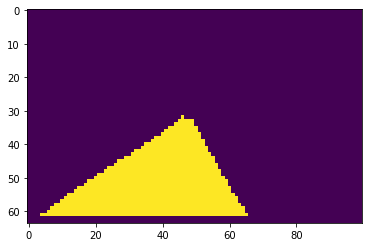

In [20]:
trainset = Dataset(train_x, train_y)
img, y = trainset[6]
print(y.shape)
#y=y.squeeze()
plt.imshow(y)




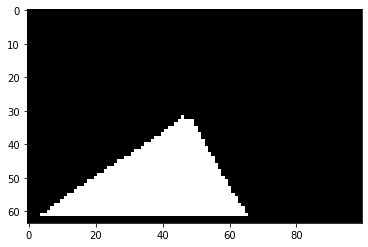

In [21]:
trainset = Dataset(train_x, train_y, transform=transform)
img,c=trainset[6]
img=img.cuda()
model.eval()
z=model(img[None])
preds = torch.argmax(z, dim=1)
out = c.cpu().numpy()
out = out.squeeze()
plt.imshow(out,cmap='gray')